#                                 Mini Project on Web Scraping

Group Name: ML CHAMPS

    Group Members: G Shilpa (2019AIML580), Ram Sharma (), Sree Ram ()

Web Scrapping:

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.


The four tasks that will be done as a part of this mini project is follows:
 
    A. Data Acquisition  
    B. Data Cleaning 
    C. Data Integration 
    D. Exploratory Data Analysis and Recommendation

## Data Science Project Lifecycle

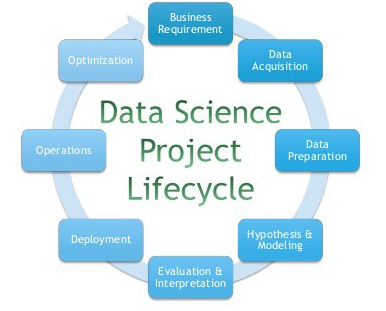

Data Acquisition - involves acquiring data from both internal and external sources, including social media or web scraping. In a steady state, data extraction and transfer routines would be in place, and new sources, once identified would be acquired following the established processes.

Data preparation - Usually referred to as "data wrangling", this step involves cleaning the data and reshaping it into a readily usable form for performing data science. This is similar to the traditional ETL steps in data warehousing in certain aspects, but involves more exploratory analysis and is primarily aimed at extracting features in usable formats.

Hypothesis and modeling are the traditional data mining steps - however in a data science project, these are not limited to statistical samples. Indeed the idea is to apply machine learning techniques to all data. A key sub-step is performed here for model selection. This involves the separation of a training set for training the candidate machine-learning models, and validation sets and test sets for comparing model performances and selecting the best performing model, gauging model accuracy and preventing over-fitting.

Steps 2 through 4 are repeated a number of times as needed; as the understanding of data and business becomes clearer and results from initial models and hypotheses are evaluated, further tweaks are performed. These may sometimes include Step 5 (deployment) and be performed in a pre-production or "limited" / "pilot" environment before the actual full-scale "production" deployment, or could include fast-tweaks after deployment, based on the continuous deployment model.
Once the model has been deployed in production, it is time for regular maintenance and operations. This operations phase could also follow a target DevOps model which gels well with the continuous deployment model, given the rapid time-to-market requirements in big data projects. Ideally, the deployment includes performance tests to measure model performance, and can trigger alerts when the model performance degrades beyond a certain acceptable threshold.


The optimization phase is the final step in the data science project life-cycle. This could be triggered by failing performance, or due to the need to add new data sources and retraining the model, or even to deploy improved versions of the model based on better algorithms

## (A)	DATA ACQUISITION

e-commerce platforms Chosen are:
     >Following platforms have been chosen for scrapping
     - Big Basket (G Shilpa)
     - Amazon (Ram Sharma)
     - Grofers (sri Ram)

Member 1: G Shilpa Id: 2019AIML580 ECommerce Website: Big Basket

First step is to import the neccessary libraries used in python

In [109]:
# scraping of Big Basket
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

Below is the method created for scraping the data from Big Basket

In [110]:
def webscrapBB(url,driver):
    products=[] #List to store name of the product
    productqty=[]
    mrpprices=[] #List to store MRP of the product
    offerprices=[] #List to store Offer price of the product
    driver.get(url)
    content = driver.page_source
    soup = BeautifulSoup(content)
    for a in soup.findAll('div'):
        ngscope = a.find('div', attrs={'class':'ng-scope'}) 
        if ngscope is not None:
            pname=ngscope.find('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'})
            for pname in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'}):
                if pname is not None:
                    panchor = pname.find('a', attrs={'class':'ng-binding'})
                    #print(panchor.text)
                    products.append(panchor.text)
            
            for divQty in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-7 qnty-selection'}):
                if divQty is not None:
                    pqty = divQty.find('span', attrs={'class':'ng-binding'})
                    if pqty is not None:
                        productqty.append(pqty.text)
                    else:
                        productqty.append("0")
                        
            for divmrp in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-12 add-bskt'}):
                if divmrp is not None:
                    pmrp = divmrp.find('span', attrs={'class':'mp-price ng-scope'})
                    if pmrp is not None:
                        mrpprices.append(pmrp.text)
                        #print(pmrp.text)
                    else:
                        mrpprices.append("0")
            for divoffer in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-12 add-bskt'}):
                if divoffer is not None:
                    poffer = divoffer.find('span', attrs={'class':'discnt-price'})
                    if poffer is not None:
                        offerprices.append(poffer.text)
                        #print(poffer.text)
           
    return products,productqty,mrpprices,offerprices

In [111]:
#Vegitables 
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url="https://www.bigbasket.com/pc/fruits-vegetables/fresh-vegetables/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()

In [112]:
len(productNames)

62

In [113]:
len(productQuantity)

62

In [114]:
len(productMRP)

62

In [115]:
len(productOfferPrice)

62

In [116]:
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbvegitables.csv', index=False, encoding='utf-8')

In [117]:
bbvegitables = pd.read_csv('bbvegitables.csv')
bbvegitables["Vendor"]="BigBasket"
bbvegitables["Category"]="FruitsAndVegitables"

In [118]:
bbvegitables.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Onion/Vulligadda/ Ullipaya,500 g,Rs 11.25,Rs 9,BigBasket,FruitsAndVegitables
1,Potato/Alugadda/Bangala Dumpa/aloo,500 g,Rs 22.50,Rs 18,BigBasket,FruitsAndVegitables
2,Tomato - Local,500 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
3,Ladies Finger/Bendakaya,250 g,Rs 10,Rs 8,BigBasket,FruitsAndVegitables
4,Carrot - Local,250 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
5,Capsicum - Green/Bengalur Mirapakayi/ Shimla M...,500 g,Rs 37.50,Rs 30,BigBasket,FruitsAndVegitables
6,Palak/Paalakura,100 g,Rs 18.75,Rs 15,BigBasket,FruitsAndVegitables
7,Sweet Corn / Indian Bhutta/Mokkajonna/ Bhutta,1 pc,Rs 36.25,Rs 29,BigBasket,FruitsAndVegitables
8,Bottle Gourd/Anapakaya/Sorakaya,1 pc,Rs 31.25,Rs 25,BigBasket,FruitsAndVegitables
9,Cucumber/Kheera,500 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables


In [119]:
bbvegitables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      62 non-null     object
 1   Product_Quantity  62 non-null     object
 2   MRP_Price         62 non-null     object
 3   Offer_Price       62 non-null     object
 4   Vendor            62 non-null     object
 5   Category          62 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [120]:
#Fruits 
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url="https://www.bigbasket.com/pc/fruits-vegetables/fresh-fruits/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()

In [121]:
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbfruits.csv', index=False, encoding='utf-8')

In [122]:
bbfruits = pd.read_csv('bbfruits.csv')
bbfruits["Vendor"]="BigBasket"
bbfruits["Category"]="FruitsAndVegitables"

In [124]:
bbfruits.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Banganapalli Mango,1 kg,Rs 111.25,Rs 89,BigBasket,FruitsAndVegitables
1,Watermelon - Small/Puchhakaya,1 pc,Rs 56.25,Rs 45,BigBasket,FruitsAndVegitables
2,Banana - Robusta/Aarati pandu,500 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
3,Pomegranate/Danimma Pandu,4 pcs,Rs 161.25,Rs 129,BigBasket,FruitsAndVegitables
4,Tender Coconut - Medium/Bangalore Nut,1 pc,Rs 52.50,Rs 42,BigBasket,FruitsAndVegitables
5,Grapes - Sonaka Seedless/Draksha,1 kg,Rs 173.75,Rs 139,BigBasket,FruitsAndVegitables
6,Fruit Combo,Combo,Rs 372.50,Rs 298,BigBasket,FruitsAndVegitables
7,Mosambi - Economy,3 kg,Rs 123.75,Rs 99,BigBasket,FruitsAndVegitables
8,Muskmelon - Netted Small/Kharbuja,1 pc,Rs 53.75,Rs 43,BigBasket,FruitsAndVegitables
9,"Apple - Red Delicious/Washington, Regular",4 pcs,Rs 198.75,Rs 159,BigBasket,FruitsAndVegitables


In [125]:
#Dal and Pulses
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url ="https://www.bigbasket.com/pc/foodgrains-oil-masala/dals-pulses/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()

In [126]:
len(productNames)

62

In [127]:
len(productMRP)

62

In [128]:
len(productOfferPrice)

62

In [129]:
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbdalpulses.csv', index=False, encoding='utf-8')

In [130]:
bbdalpulses = pd.read_csv('bbdalpulses.csv')
bbdalpulses["Vendor"]="BigBasket"
bbdalpulses["Category"]="DalAndPulses"

In [131]:
bbdalpulses.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Toor/Arhar Dal,5 kg,Rs 800,Rs 600,BigBasket,DalAndPulses
1,Peanuts/Mungaphali/Shengdana - Raw,1 kg,Rs 220,Rs 156,BigBasket,DalAndPulses
2,Peanuts/Mungaphali/Shengdana - Raw,1 kg,Rs 230,Rs 162,BigBasket,DalAndPulses
3,Urad Gota - Whole,1 kg,Rs 200,Rs 152,BigBasket,DalAndPulses
4,Toor Dal/Arhar Dal - Desi,5 kg,Rs 850,Rs 620,BigBasket,DalAndPulses
5,Moong Dal,1 kg,Rs 190,Rs 149,BigBasket,DalAndPulses
6,Green Moong Whole/Sabut,1 kg,Rs 180,Rs 160,BigBasket,DalAndPulses
7,Channa Dal,2 kg,Rs 300,Rs 178,BigBasket,DalAndPulses
8,Organic - Toor Dal / Kandipappu,2 kg,Rs 399,Rs 269,BigBasket,DalAndPulses
9,Fried Gram/Bengal Gram,1 kg,Rs 180,Rs 113.40,BigBasket,DalAndPulses


In [146]:
# Biscuits and cookies
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url ="https://www.bigbasket.com/pc/snacks-branded-foods/biscuits-cookies/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()

In [147]:
len(productNames)

62

In [148]:
len(productMRP)

62

In [149]:
len(productOfferPrice)

62

In [150]:
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbsaltjaggery.csv', index=False, encoding='utf-8')

bbsaltjaggery = pd.read_csv('bbsaltjaggery.csv')

bbsaltjaggery["Vendor"]="BigBasket"
bbsaltjaggery["Category"]="BisCuitsAndCookies"


In [151]:
bbsaltjaggery

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Little Hearts Biscuits,34.5 g,Rs 10,Rs 9.50,BigBasket,BisCuitsAndCookies
1,Osmania Biscuits,400 g,0,MRP: Rs 130,BigBasket,BisCuitsAndCookies
2,Dark Fantasy Biscuits - Cookies - Choco Fills,300 g,Rs 120,Rs 102.90,BigBasket,BisCuitsAndCookies
3,Hide & Seek Chocolate,120 g,0,MRP: Rs 30,BigBasket,BisCuitsAndCookies
4,Gluco Biscuits - Parle-G,130 g,0,MRP: Rs 10,BigBasket,BisCuitsAndCookies
...,...,...,...,...,...,...
57,Biscuits - Little Hearts,10x18 g,0,MRP: Rs 50,BigBasket,BisCuitsAndCookies
58,Waffy Choco Roll,250 g,Rs 150,Rs 75,BigBasket,BisCuitsAndCookies
59,Digestive Biscuits,200 g,Rs 159,Rs 149,BigBasket,BisCuitsAndCookies
60,Little Hearts Biscuits,34.5 g,Rs 10,Rs 9.50,BigBasket,BisCuitsAndCookies


In [152]:
# Bath and Handwash
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url ="https://www.bigbasket.com/pc/beauty-hygiene/bath-hand-wash/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbbathandhandwash.csv', index=False, encoding='utf-8')
bbbathandhandwash = pd.read_csv('bbbathandhandwash.csv')
bbbathandhandwash["Vendor"]="BigBasket"
bbbathandhandwash["Category"]="BathAndHandWash"


In [153]:
bbbathandhandwash.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category


In [154]:
len(bbbathandhandwash)

0

In [155]:
# Health and Medicine
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url ="https://www.bigbasket.com/pc/beauty-hygiene/health-medicine/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbhealth.csv', index=False, encoding='utf-8')
bbhealth = pd.read_csv('bbhealth.csv')
bbhealth["Vendor"]="BigBasket"
bbhealth["Category"]="HealthAndMedicine"

In [156]:
bbhealth.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Antiseptic Disinfectant Liquid - For First Aid...,550 ml,0,MRP: Rs 160.83,BigBasket,HealthAndMedicine
1,Chyawanprash,500 g,Rs 180,Rs 170.10,BigBasket,HealthAndMedicine
2,Infrared Forehead Thermometer Gun,1 pc,0,MRP: Rs 7999,BigBasket,HealthAndMedicine
3,Health Drink - Plus Orange,200 ml,0,MRP: Rs 40,BigBasket,HealthAndMedicine
4,"3 Ply Face Mask for Men - Assorted, 91812",5 pcs,0,MRP: Rs 599,BigBasket,HealthAndMedicine
5,"Face Mask - Protekt P-W95 Reusable, Large, White",1 pc,Rs 240,Rs 220.80,BigBasket,HealthAndMedicine
6,"Face Mask - Protekt P-W95 Reusable, Small, Nav...",1 pc,Rs 240,Rs 220.80,BigBasket,HealthAndMedicine
7,"Face Mask - Protekt P-W95 Reusable, Small, White",1 pc,Rs 240,Rs 220.80,BigBasket,HealthAndMedicine
8,Disposable Finger Gloves,30 pcs,Rs 460,Rs 349,BigBasket,HealthAndMedicine
9,Fruit Salt - Lemon Flavor,100 g,0,MRP: Rs 120,BigBasket,HealthAndMedicine


In [157]:
len(bbhealth)

62

In [158]:
# Cookware
productNames=[] #List to store name of the product
productQuantity=[] # Quantity of the product
productMRP=[] #List to store price of the product
productOfferPrice=[] #List to store rating of the product
driver = webdriver.Chrome("chromedriver")
url ="https://www.bigbasket.com/pc/kitchen-garden-pets/cookware-non-stick/?nc=nb"
productNames,productQuantity,productMRP,productOfferPrice = webscrapBB(url,driver)
driver.close()
df = pd.DataFrame({'Product_Name':productNames,'Product_Quantity':productQuantity,'MRP_Price':productMRP,'Offer_Price':productOfferPrice}) 
df.to_csv('bbcookware.csv', index=False, encoding='utf-8')
bbcookware = pd.read_csv('bbhealth.csv')
bbcookware["Vendor"]="BigBasket"
bbcookware["Category"]="Cookware"



In [159]:
bbcookware

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Antiseptic Disinfectant Liquid - For First Aid...,550 ml,0,MRP: Rs 160.83,BigBasket,Cookware
1,Chyawanprash,500 g,Rs 180,Rs 170.10,BigBasket,Cookware
2,Infrared Forehead Thermometer Gun,1 pc,0,MRP: Rs 7999,BigBasket,Cookware
3,Health Drink - Plus Orange,200 ml,0,MRP: Rs 40,BigBasket,Cookware
4,"3 Ply Face Mask for Men - Assorted, 91812",5 pcs,0,MRP: Rs 599,BigBasket,Cookware
...,...,...,...,...,...,...
57,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,MRP: Rs 599,BigBasket,Cookware
58,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,MRP: Rs 599,BigBasket,Cookware
59,3 Ply Face Mask for Men - Dark Blue,5 pcs,0,MRP: Rs 599,BigBasket,Cookware
60,Antiseptic Disinfectant Liquid - For First Aid...,550 ml,0,MRP: Rs 160.83,BigBasket,Cookware


In [160]:
df = pd.concat([bbvegitables,bbfruits,bbdalpulses, bbsaltjaggery,bbbathandhandwash,bbhealth,bbcookware], ignore_index=True)
#df = pd.concat([dataset, dataset1,dataset2])

In [161]:
df[df.duplicated(['Product_Name'])]

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
20,Onion/Vulligadda/ Ullipaya,500 g,Rs 11.25,Rs 9,BigBasket,FruitsAndVegitables
21,Potato/Alugadda/Bangala Dumpa/aloo,500 g,Rs 22.50,Rs 18,BigBasket,FruitsAndVegitables
22,Tomato - Local,500 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
23,Ladies Finger/Bendakaya,250 g,Rs 10,Rs 8,BigBasket,FruitsAndVegitables
24,Carrot - Local,250 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
...,...,...,...,...,...,...
367,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,MRP: Rs 599,BigBasket,Cookware
368,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,MRP: Rs 599,BigBasket,Cookware
369,3 Ply Face Mask for Men - Dark Blue,5 pcs,0,MRP: Rs 599,BigBasket,Cookware
370,Antiseptic Disinfectant Liquid - For First Aid...,550 ml,0,MRP: Rs 160.83,BigBasket,Cookware


In [162]:
df.drop_duplicates(subset ="Product_Name", keep = 'first', inplace = True)

In [163]:
df.tail(77)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
18,Palak 250g +Ladies Finger+Cucumber+Capsicum Gr...,Combo,Rs 132.65,Rs 109.90,BigBasket,FruitsAndVegitables
19,Sweet Potato/Chilakada Dumpa,250 g,Rs 17.50,Rs 14,BigBasket,FruitsAndVegitables
62,Banganapalli Mango,1 kg,Rs 111.25,Rs 89,BigBasket,FruitsAndVegitables
63,Watermelon - Small/Puchhakaya,1 pc,Rs 56.25,Rs 45,BigBasket,FruitsAndVegitables
64,Banana - Robusta/Aarati pandu,500 g,Rs 16.25,Rs 13,BigBasket,FruitsAndVegitables
...,...,...,...,...,...,...
262,Infrared Thermometer For Adults & Kids,1 pc,Rs 9990,Rs 3899,BigBasket,HealthAndMedicine
263,"Surgical Face Mask 3-Layer- Disposable, Anti-D...",5x10 pcs,Rs 500,Rs 490,BigBasket,HealthAndMedicine
265,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,MRP: Rs 599,BigBasket,HealthAndMedicine
266,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,MRP: Rs 599,BigBasket,HealthAndMedicine


In [164]:
len(df)

95

In [165]:
'''products=[] #List to store name of the product
mrpprices=[] #List to store price of the product
offerprices=[] #List to store rating of the product
content = driver.page_source
soup = BeautifulSoup(content)

for a in soup.findAll('div'):
    ngscope = a.find('div', attrs={'class':'ng-scope'}) 
    if ngscope is not None:
        pname=ngscope.find('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'})
        for pname in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'}):
            if pname is not None:
                panchor = pname.find('a', attrs={'class':'ng-binding'})
                #print(panchor.text)
                products.append(panchor.text)
        for divmrp in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-12 add-bskt'}):
            if divmrp is not None:
                pmrp = divmrp.find('span', attrs={'class':'mp-price ng-scope'})
                if pmrp is not None:
                    mrpprices.append(pmrp.text)
                    #print(pmrp.text)
        for divoffer in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-12 add-bskt'}):
            if divoffer is not None:
                poffer = divoffer.find('span', attrs={'class':'discnt-price'})
                if poffer is not None:
                    offerprices.append(poffer.text)
                    #print(poffer.text)'''

"products=[] #List to store name of the product\nmrpprices=[] #List to store price of the product\nofferprices=[] #List to store rating of the product\ncontent = driver.page_source\nsoup = BeautifulSoup(content)\n\nfor a in soup.findAll('div'):\n    ngscope = a.find('div', attrs={'class':'ng-scope'}) \n    if ngscope is not None:\n        pname=ngscope.find('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'})\n        for pname in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-7 prod-name'}):\n            if pname is not None:\n                panchor = pname.find('a', attrs={'class':'ng-binding'})\n                #print(panchor.text)\n                products.append(panchor.text)\n        for divmrp in ngscope.findAll('div', attrs={'class':'col-sm-12 col-xs-12 add-bskt'}):\n            if divmrp is not None:\n                pmrp = divmrp.find('span', attrs={'class':'mp-price ng-scope'})\n                if pmrp is not None:\n                    mrpprices.append(pmrp.text)

## (B)	DATA CLEANING

In [166]:
#Since the MRP Price contains Rs string, clean it up
df["MRP_Price"].replace(to_replace ="Rs ", value = "", regex = True, inplace=True)

In [167]:
df.tail(77)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
18,Palak 250g +Ladies Finger+Cucumber+Capsicum Gr...,Combo,132.65,Rs 109.90,BigBasket,FruitsAndVegitables
19,Sweet Potato/Chilakada Dumpa,250 g,17.50,Rs 14,BigBasket,FruitsAndVegitables
62,Banganapalli Mango,1 kg,111.25,Rs 89,BigBasket,FruitsAndVegitables
63,Watermelon - Small/Puchhakaya,1 pc,56.25,Rs 45,BigBasket,FruitsAndVegitables
64,Banana - Robusta/Aarati pandu,500 g,16.25,Rs 13,BigBasket,FruitsAndVegitables
...,...,...,...,...,...,...
262,Infrared Thermometer For Adults & Kids,1 pc,9990,Rs 3899,BigBasket,HealthAndMedicine
263,"Surgical Face Mask 3-Layer- Disposable, Anti-D...",5x10 pcs,500,Rs 490,BigBasket,HealthAndMedicine
265,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,MRP: Rs 599,BigBasket,HealthAndMedicine
266,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,MRP: Rs 599,BigBasket,HealthAndMedicine


In [168]:
#Since the Offer Price contains MRP: Rs string , clean it up
df["Offer_Price"].replace(to_replace ="MRP: Rs ", value = "", regex = True, inplace=True)
df["Offer_Price"].replace(to_replace ="Rs ", value = "", regex = True, inplace=True)

In [169]:
df.groupby(['Category','Product_Name']).sum()

Product_Quantity  \
Category           Product_Name                                                          
BisCuitsAndCookies 50-50 Maska Chaska Salted Biscuits                             50 g   
                   Biscuits - Karachi's Fruit (Pure Vegetarian)                  400 g   
                   Biscuits - Little Hearts                                    10x18 g   
                   Bourbon Chocolate Cream Biscuits                              150 g   
                   Cashew Biscuits                                               400 g   
...                                                                                ...   
HealthAndMedicine  Health Drink - Plus Orange                                   200 ml   
                   Infrared Forehead Thermometer Gun                              1 pc   
                   Infrared Thermometer For Adults & Kids                         1 pc   
                   Reusable Face Mask - 2 Ply, Cotton, Assorted Co...     21.5 X 11 cm   
                   Surgical Face Mask 3-Layer- Disposable, Anti-Du...         5x10 pcs   

                                                                      MRP_Price  \
Category           Product_Name                                                   
BisCuitsAndCookies 50-50 Maska Chaska Salted Biscuits                         0   
                   Biscuits - Karachi's Fruit (Pure Vegetarian)               0   
                   Biscuits - Little Hearts                                   0   
                   Bourbon Chocolate Cream Biscuits                          30   
                   Cashew Biscuits                                            0   
...                                                                         ...   
HealthAndMedicine  Health Drink - Plus Orange                                 0   
                   Infrared Forehead Thermometer Gun                          0   
                   Infrared Thermometer For Adults & Kids                  9990   
                   Reusable Face Mask - 2 Ply, Cotton, Assorted Co...        99   
                   Surgical Face Mask 3-Layer- Disposable, Anti-Du...       500   

                                                                      Offer_Price  \
Category           Product_Name                                                     
BisCuitsAndCookies 50-50 Maska Chaska Salted Biscuits                          10   
                   Biscuits - Karachi's Fruit (Pure Vegetarian)               140   
                   Biscuits - Little Hearts                                    50   
                   Bourbon Chocolate Cream Biscuits                            27   
                   Cashew Biscuits                                            160   
...                                                                           ...   
HealthAndMedicine  Health Drink - Plus Orange                                  40   
                   Infrared Forehead Thermometer Gun                         7999   
                   Infrared Thermometer For Adults & Kids                    3899   
                   Reusable Face Mask - 2 Ply, Cotton, Assorted Co...          79   
                   Surgical Face Mask 3-Layer- Disposable, Anti-Du...         490   

                                                                          Vendor  
Category           Product_Name                                                   
BisCuitsAndCookies 50-50 Maska Chaska Salted Biscuits                  BigBasket  
                   Biscuits - Karachi's Fruit (Pure Vegetarian)        BigBasket  
                   Biscuits - Little Hearts                            BigBasket  
                   Bourbon Chocolate Cream Biscuits                    BigBasket  
                   Cashew Biscuits                                     BigBasket  
...                                                                          ...  
HealthAndMedicine  Health Drink - Plus Orange    

In [170]:
#q = pd.crosstab(df.Category, df.Product_Name, margins=True, margins_name="Total",rownames=['Release Time'])

In [171]:
test

,0,1,2
0,500,g,None
1,500,g,None
2,500,g,None
3,250,g,None
4,250,g,None
...,...,...,...
324,3x3,pcs,None
325,30,stems/60,swabs
326,5x10,pcs,None
328,5,pcs,None


In [101]:
#Separate weight in to weight, measure
#print(df.drop(df.index[[110]]))

                                          Product_Name Product_Quantity  \
0                           Onion/Vulligadda/ Ullipaya            500 g   
1                   Potato/Alugadda/Bangala Dumpa/aloo            500 g   
2                                       Tomato - Local            500 g   
3                              Ladies Finger/Bendakaya            250 g   
4                                       Carrot - Local            250 g   
..                                                 ...              ...   
323  Anti Viral Face Mask With 2 Filters - White Wi...             1 pc   
324  Reusable Face Mask - 2 Ply, Cotton, Assorted C...          3x3 pcs   
326  Surgical Face Mask 3-Layer- Disposable, Anti-D...         5x10 pcs   
328          3 Ply Face Mask for Men - Assorted, 21974            5 pcs   
329          3 Ply Face Mask for Men - Assorted, 25854            5 pcs   

    MRP_Price Offer_Price     Vendor             Category  
0       11.25           9  BigBasket  F

In [174]:
#df[['Product_Quantity','measure']] = df.Product_Quantity.str.split(expand=True)


In [175]:
len(df)

95

In [179]:
df.tail(50)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
130,Green Moong Whole/Sabut,1 kg,180,160,BigBasket,DalAndPulses
131,Channa Dal,2 kg,300,178,BigBasket,DalAndPulses
132,Organic - Toor Dal / Kandipappu,2 kg,399,269,BigBasket,DalAndPulses
133,Fried Gram/Bengal Gram,1 kg,180,113.40,BigBasket,DalAndPulses
134,Kabuli Channa,1 kg,180,104,BigBasket,DalAndPulses
135,Urad Dal - Split,200 g,50,35,BigBasket,DalAndPulses
136,Masoor Dal,1 kg,160,116,BigBasket,DalAndPulses
137,Organic - Raw Peanuts,1 kg,225,174,BigBasket,DalAndPulses
139,Toor Dal,1 kg,149,135.45,BigBasket,DalAndPulses
140,Organic - Urad Whole (Gota) / Minapappu,1 kg,230,172,BigBasket,DalAndPulses


In [186]:
df['quantity']=df['Product_Quantity']

In [187]:
df[['quantity','measure','extra','extra1']] = df.quantity.str.split(expand=True)

In [200]:
df.drop(columns='')

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,quantity,measure,extra,extra1
0,Onion/Vulligadda/ Ullipaya,500 g,11.25,9,BigBasket,FruitsAndVegitables,500,g,None,None
1,Potato/Alugadda/Bangala Dumpa/aloo,500 g,22.50,18,BigBasket,FruitsAndVegitables,500,g,None,None
2,Tomato - Local,500 g,16.25,13,BigBasket,FruitsAndVegitables,500,g,None,None
3,Ladies Finger/Bendakaya,250 g,10,8,BigBasket,FruitsAndVegitables,250,g,None,None
4,Carrot - Local,250 g,16.25,13,BigBasket,FruitsAndVegitables,250,g,None,None
...,...,...,...,...,...,...,...,...,...,...
262,Infrared Thermometer For Adults & Kids,1 pc,9990,3899,BigBasket,HealthAndMedicine,1,pc,None,None
263,"Surgical Face Mask 3-Layer- Disposable, Anti-D...",5x10 pcs,500,490,BigBasket,HealthAndMedicine,5x10,pcs,None,None
265,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,599,BigBasket,HealthAndMedicine,5,pcs,None,None
266,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,599,BigBasket,HealthAndMedicine,5,pcs,None,None


In [201]:
df

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,quantity,measure,extra,,extra1
0,Onion/Vulligadda/ Ullipaya,500 g,11.25,9,BigBasket,FruitsAndVegitables,500,g,None,None,None
1,Potato/Alugadda/Bangala Dumpa/aloo,500 g,22.50,18,BigBasket,FruitsAndVegitables,500,g,None,None,None
2,Tomato - Local,500 g,16.25,13,BigBasket,FruitsAndVegitables,500,g,None,None,None
3,Ladies Finger/Bendakaya,250 g,10,8,BigBasket,FruitsAndVegitables,250,g,None,None,None
4,Carrot - Local,250 g,16.25,13,BigBasket,FruitsAndVegitables,250,g,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
262,Infrared Thermometer For Adults & Kids,1 pc,9990,3899,BigBasket,HealthAndMedicine,1,pc,None,None,None
263,"Surgical Face Mask 3-Layer- Disposable, Anti-D...",5x10 pcs,500,490,BigBasket,HealthAndMedicine,5x10,pcs,None,None,None
265,"3 Ply Face Mask for Men - Assorted, 21974",5 pcs,0,599,BigBasket,HealthAndMedicine,5,pcs,None,None,None
266,"3 Ply Face Mask for Men - Assorted, 25854",5 pcs,0,599,BigBasket,HealthAndMedicine,5,pcs,None,None,None


### Data Scraping from Jio Mart

In [1]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# utility to print any error passed
def log_error(e):
    print(e)

In [ ]:
# check if the response returned is good or not
def is_good_response(resp):
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 and content_type is not None and content_type.find('html') > -1)

In [ ]:
# utility to get html content from a given url
def simple_get(url):
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else :
                return None
    except RequestException as re:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None

In [ ]:
# JioMart data scraping - Dals and Pulses

raw_html_dp = simple_get('https://www.jiomart.com/category/staples/dals-pulses')

# get html parsed using Beautiful soup
html_soup = BeautifulSoup(raw_html_dp, 'html.parser')

# print(html_soup)

In [ ]:
containers = html_soup.findAll("div", {"class" : "col-md-3 p-0"})
# print (BeautifulSoup.prettify(containers[0]))

In [ ]:
ProductNamesList = []
ProductQtyList = []
MRP_List = []
Offer_Price_List = []
Vendor_List = []
Category_List = []

for container in containers:
    product = container.div.img["alt"]
    ProductNamesList.append(product)
    
    price_container = container.findAll("strike", {"id" : "price"})
    price = price_container[0].text.strip()
    MRP_List.append(price)
    
    final_price_container = container.findAll("span", {"id" : "final_price"})
    final_price = final_price_container[0].text.strip()
    Offer_Price_List.append(final_price)
    
    #print ("Product:" + product)
    #print ("Price:" + price)
    #print ("Final Price:" + final_price)
    
    Vendor_List.append('JioMart')
    Category_List.append('Dals-Vegetables')
    
#     print (product + "," + price + "," + final_price + ",JioMart" + ",Dals-Vegetables" +"\n")
#     f.write(product + "," + price + "," + final_price + ",JioMart" + ",Dals-Vegetables" +"\n")

    
# print('ProductNamesList =>', ProductNamesList)
# print('MRP_List =>', MRP_List)
# print('Offer_Price_List =>', Offer_Price_List)
# print('Vendor_List =>', Vendor_List)
# print('Category_List =>', Category_List)

# f.close()

In [ ]:
import pandas as pd

table_dict = { 'Product_Name' : ProductNamesList,
                'MRP_Price' : MRP_List,
                'Offer_Price' : Offer_Price_List,
                'Vendor' : Vendor_List,
                'Category' : Category_List}

df = pd.DataFrame(table_dict)

df.head()

In [ ]:
price_qty_mixed=df.Product_Name.str.split(expand=True,)
print(price_qty_mixed)
print(type(price_qty_mixed))

In [ ]:
qty_df = df.Product_Name.str.extract('(\d+)')

df['Product_Quantity'] = qty_df

In [ ]:
df['Product_Name'] = df['Product_Name'].str[:16]

In [ ]:
import numpy as np

newdf = df[['Product_Name', 'Product_Quantity', 'MRP_Price', 'Offer_Price', 'Vendor', 'Category']].copy()

newdf['Product_Quantity'] = pd.to_numeric(df['Product_Quantity'])

# newdf['Product_Quantity'] = newdf['Product_Quantity'].filter().div(1000)

a = np.array(newdf['Product_Quantity'].values.tolist())
# print (a)

newdf['Product_Quantity'] = np.where(a > 100, a/1000, a).tolist()

newdf['MRP_Price'] = newdf['MRP_Price'].map(lambda x: x.lstrip('₹').strip())
newdf['Offer_Price'] = newdf['Offer_Price'].map(lambda x: x.lstrip('₹').strip())

newdf.head()
newdf.describe()

newdf['MRP_Price'] = pd.to_numeric(newdf['MRP_Price'])
newdf['Offer_Price(Rs)'] = pd.to_numeric(newdf['Offer_Price'])